In [ ]:
import autograd.numpy as np
from autograd import jacobian

def F_func(x, u):
    return np.array([x**2, np.sin(u)])

def get_jacobian_func(func, argnum):
    jacobian_func = jacobian(func, argnum=argnum)
    return lambda *args: jacobian_func(*args)

F_x = get_jacobian_func(F_func, argnum=0)
x = 2.0
u = 3.0
F_x_prime = F_x(x, u)
print(F_x_prime)
print(jacobian(F_func, argnum=0)(x,u))



In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Define a MIMO state-space system
A = [[-1, 0.5],
     [0, -2]]
B = [[1, 0],
     [0, 1]]
C = [[1, 0],
     [0, 1]]
D = [[0, 0],
     [0, 0]]
sys_ss = control.ss(A, B, C, D)

# Compute the frequency response
omega = np.logspace(-2, 2, num=100)
mag, phase, omega = control.freqresp(sys_ss, omega)

# Plot the magnitude and phase response
fig, axs = plt.subplots(4, 2, figsize = (10, 18), sharex=True)
i_phase= 0
for i in range(sys_ss.noutputs*2): # times two to capture the magnitude /and/ phase for each input
    if i % 2 == 0:
        i_adj = int(i/2)
        for j in range(sys_ss.ninputs):
            axs[i, j].semilogx(omega, 20 * np.log10(np.abs(mag[i_adj, j, :])))
            axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
            axs[i, j].grid(True)
            axs[i, j].set_xlim([omega[0], omega[-1]])
    else: 
        for j in range(sys_ss.ninputs):
            hld = np.rad2deg(phase[i_phase, j, :])
            axs[i, j].semilogx(omega, np.rad2deg(phase[i_phase, j, :]))
            axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
            axs[i, j].grid(True)
            axs[i, j].set_xlim([omega[0], omega[-1]])
        i_phase = i_phase + 1 
axs[0, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].set_xlabel('Frequency (rad/s)')
axs[1, 1].set_xlabel('Frequency (rad/s)')
plt.show()


[-4.34272769e-04 -5.23077739e-04 -6.30041230e-04 -7.58875635e-04
 -9.14052059e-04 -1.10095525e-03 -1.32607012e-03 -1.59720630e-03
 -1.92376831e-03 -2.31708080e-03 -2.79077981e-03 -3.36128336e-03
 -4.04835741e-03 -4.87579625e-03 -5.87224001e-03 -7.07215658e-03
 -8.51702032e-03 -1.02567259e-02 -1.23512825e-02 -1.48728430e-02
 -1.79081290e-02 -2.15613275e-02 -2.59575420e-02 -3.12468965e-02
 -3.76094016e-02 -4.52607067e-02 -5.44588697e-02 -6.55122871e-02
 -7.87889245e-02 -9.47269811e-02 -1.13847093e-01 -1.36766132e-01
 -1.64212570e-01 -1.97043252e-01 -2.36261222e-01 -2.83033985e-01
 -3.38711230e-01 -4.04840582e-01 -4.83179441e-01 -5.75700375e-01
 -6.84587003e-01 -8.12216938e-01 -9.61128328e-01 -1.13396707e+00
 -1.33341313e+00 -1.56208647e+00 -1.82243649e+00 -2.11662175e+00
 -2.44639087e+00 -2.81297673e+00 -3.21701714e+00 -3.65851208e+00
 -4.13682377e+00 -4.65071931e+00 -5.19845011e+00 -5.77785757e+00
 -6.38649233e+00 -7.02173439e+00 -7.68090381e+00 -8.36135468e+00
 -9.06054886e+00 -9.77610

IndexError: index 0 is out of bounds for axis 0 with size 0

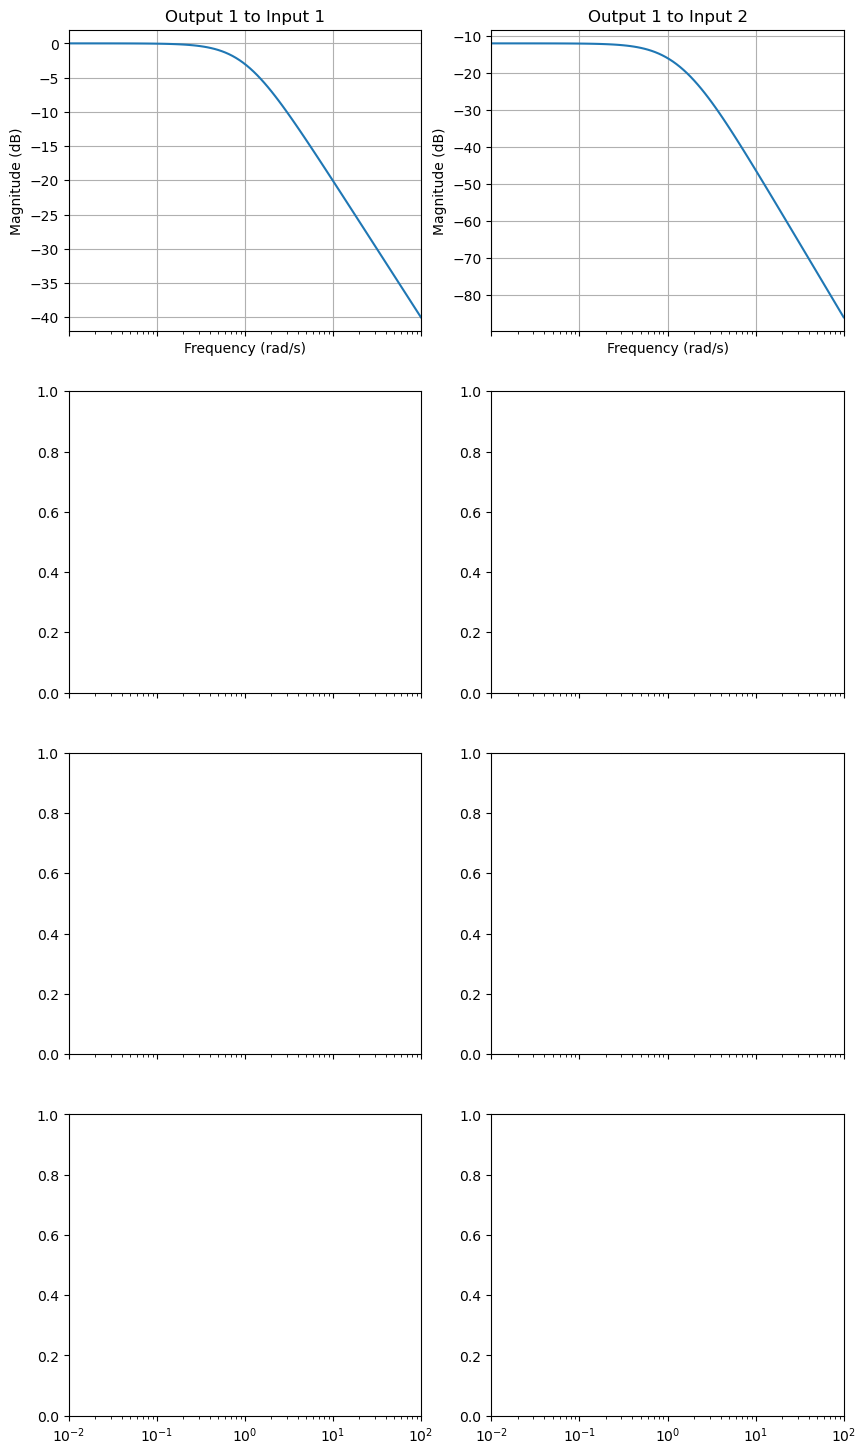

In [92]:
import control
import numpy as np
import matplotlib.pyplot as plt

def freq_resp(sys_ss: control.NonlinearIOSystem | control.LinearIOSystem, omega: np.ndarray, fig_dim_1: int = None, fig_dim_2: int = None):

    mag, phase, omega = control.freqresp(sys_ss, omega)

    # Plot the magnitude and phase response
    # TODO: unsafe when providing fig_dim_2 but not fig_dim_1. Make it a tuple? 
    if fig_dim_1 is None:
        fig, axs = plt.subplots(sys_ss.noutputs*2, sys_ss.ninputs, sharex=True)
    else:
        fig, axs = plt.subplots(sys_ss.noutputs*2, sys_ss.ninputs, figsize = (fig_dim_1, fig_dim_2), sharex=True)

    i_phase= 0
    tol = 1
    
    for i in range(sys_ss.noutputs*2): # times two to capture the magnitude /and/ phase for each input
        if i % 2 == 0:
            i_adj = int(i/2)
            for j in range(sys_ss.ninputs):
                axs[i, j].semilogx(omega, 20 * np.log10(np.abs(mag[i_adj, j, :])))
                axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
                axs[i, j].set_ylabel('Magnitude (dB)')
                axs[i, j].set_xlabel('Frequency (rad/s)')
                axs[i, j].grid(True)
                axs[i, j].set_xlim([omega[0], omega[-1]])

                # Find the corner frequency
                mag_db = 20 * np.log10(np.abs(mag[i_adj, j, :]))
                print(mag_db)
                corner_freq = np.argmax(mag_db) - 3 
                print(corner_freq)
                point = omega[np.argmax(mag_db)]
                print(point)
                print(corner_freq - tol)
                print(corner_freq + tol)
                label_point = np.where((mag_db > corner_freq - tol) & (mag_db < corner_freq + tol))[0][0]

                # axs[i,j].annotate(f'Corner Frequency: {corner_freq:.2f}', xy=(10, corner_freq),
                #     xytext=(corner_freq, -10), ha='center', va='center',
                #     arrowprops=dict(arrowstyle='->', color='black'))
        else: 
            for j in range(sys_ss.ninputs):
                hld = np.rad2deg(phase[i_phase, j, :])
                axs[i, j].semilogx(omega, np.rad2deg(phase[i_phase, j, :]))
                axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
                axs[i, j].set_ylabel('Phase (deg)')
                axs[i, j].set_xlabel('Frequency (rad/s)')
                axs[i, j].grid(True)
                axs[i, j].set_xlim([omega[0], omega[-1]])
            i_phase = i_phase + 1 

    return mag, phase, omega, plt

import control
import numpy as np
import matplotlib.pyplot as plt

# Define a MIMO state-space system
A = [[-1, 0.5],
     [0, -2]]
B = [[1, 0],
     [0, 1]]
C = [[1, 0],
     [0, 1]]
D = [[0, 0],
     [0, 0]]
sys_ss = control.ss(A, B, C, D)
omega = np.logspace(-2, 2, num=100)

mag, phase, omega, plt = freq_resp(sys_ss, omega, 10, 18)

plt.plot()